Link to the Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

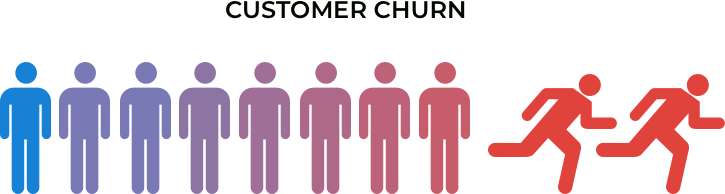

# Predicting Telecom Churn: A Deep Learning Approach

Telecom companies face a significant challenge in retaining customers, making the prediction of customer churn a pivotal aspect of strategic planning. This study delves into the realm of telecom customer churn prediction using deep learning techniques, with a focus on data cleaning, transformation, scaling, and the application of Keras and TensorFlow frameworks.

### Problem Statement:

In the dynamic landscape of telecommunications, customer churn poses a substantial concern. Identifying factors leading to churn and predicting customer departure can empower telecom companies to proactively implement retention strategies, ultimately enhancing customer satisfaction and loyalty.

### Import the important libraries and the dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

In [3]:
# since customet ID will not be needed for future analysys, we will drop it.
data.drop('customerID', axis=1, inplace=True)

In [4]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

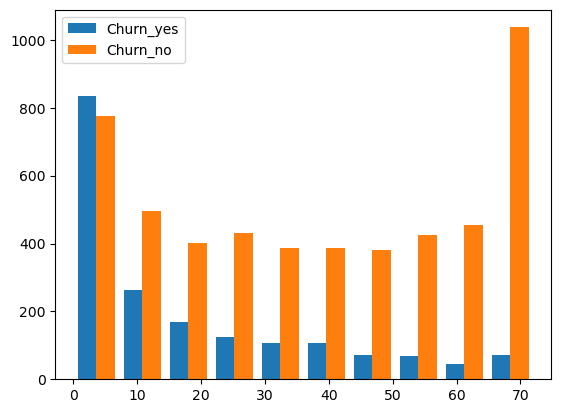

In [5]:
# histogram
tenure_churn_no = data[data.Churn == 'No'].tenure
tenure_churn_yes = data[data.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn_yes', 'Churn_no'])
plt.legend()

Here we get an idea of tenure afftects the customer churn. As the tenure increases, fewer people churn

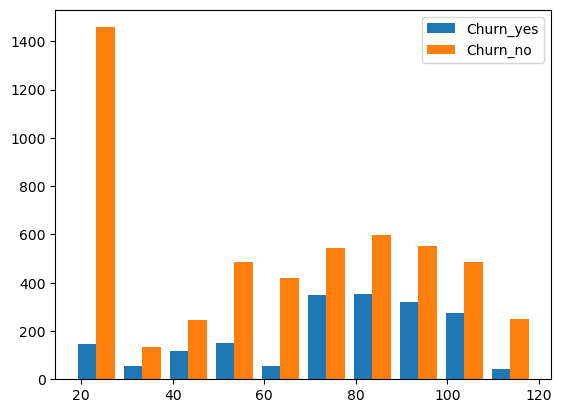

In [6]:
# histogram
m_charge_churn_no = data[data.Churn == 'No'].MonthlyCharges
m_charge_churn_yes = data[data.Churn == 'Yes'].MonthlyCharges

plt.hist([m_charge_churn_yes, m_charge_churn_no], label=['Churn_yes', 'Churn_no'])
plt.legend()

Here we see that the monthly charges does not greatly affwct the customer churn.  

In [7]:
data.shape

(7043, 20)

### Data cleaning and transformation

In [8]:
data[data.TotalCharges != ' '].shape

(7032, 20)

In [9]:
# since missing values are relatively less, we drop them and store in a new da
df = data[data.TotalCharges != ' ']

In [10]:
# change the datatype
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.TotalCharges.dtypes

C:\Users\kosht\AppData\Local\Temp\ipykernel_25020\1716231013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


dtype('float64')

In [11]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
for column in df.columns:
    if df[column].dtypes == 'object':
        df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)
        print(f'{column}: {df[column].unique()}')

C:\Users\kosht\AppData\Local\Temp\ipykernel_25020\3950511135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
for column in df.columns:
    df.replace({'Yes':1, 'No': 0}, inplace=True)
    print(f'{column}: {df[column].unique()}')

C:\Users\kosht\AppData\Local\Temp\ipykernel_25020\3276259503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Yes':1, 'No': 0}, inplace=True)


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [14]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
df['gender'].unique()

C:\Users\kosht\AppData\Local\Temp\ipykernel_25020\3065787336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


array([1, 0], dtype=int64)

In [15]:
# one hot encoding
df1 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [16]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


### Feature Engineering

In [17]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [18]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


### Model building

In [20]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.5519 - accuracy: 0.7056
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4396 - accuracy: 0.7884
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.7945
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4186 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4143 - accuracy: 0.8034
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4104 - accura

In [21]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4508 - accuracy: 0.7811


[0.45078662037849426, 0.7810945510864258]

In [22]:
y_pred = model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.21676731],
       [0.4793492 ],
       [0.00686062],
       [0.79188865],
       [0.5145518 ]], dtype=float32)

In [23]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [24]:
y_predictions = []
for i in y_pred:
    if i > 0.5:
        y_predictions.append(1)
    else:
        y_predictions.append(0)
y_predictions[:5]

[0, 0, 0, 1, 1]

In [25]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       999
           1       0.68      0.47      0.55       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

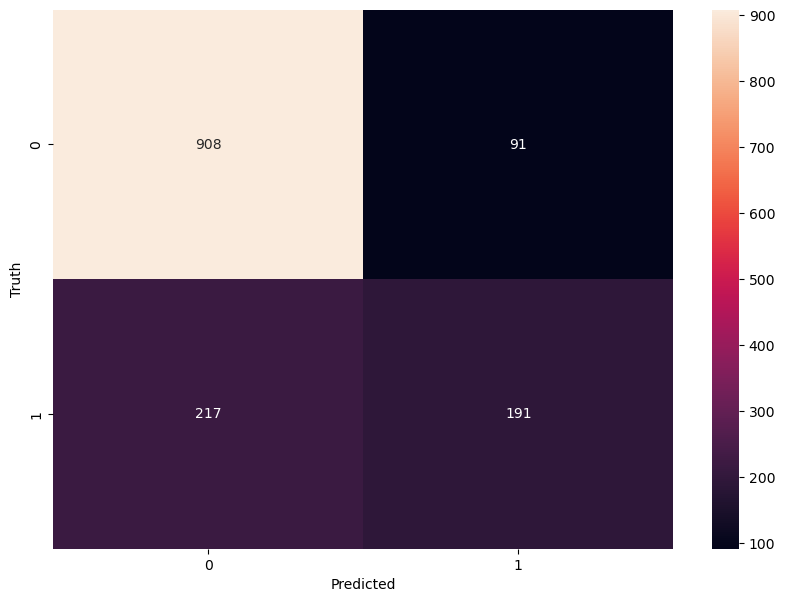

In [26]:
cm = tf.math.confusion_matrix(y_test, y_predictions)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In summary, our study delves into predicting customer churn in telecom using deep learning tools like Keras and TensorFlow. Through rigorous data cleaning, transformation, and scaling, we prepared the dataset for in-depth analysis. Employing these techniques, our model achieved a commendable accuracy of 0.78 on unseen data.